In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVR

In [30]:
train = pd.read_csv('data/train.csv.gz', compression='gzip', dtype='object')
store = pd.read_csv('data/store.csv.gz', compression='gzip', dtype='object')
test  = pd.read_csv('data/test.csv.gz' , compression='gzip', dtype='object')

In [31]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [32]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [33]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [34]:
train.shape, store.shape, test.shape

((1017209, 9), (1115, 10), (41088, 8))

In [35]:
# Drop the rows of data which open is zero.
train = train.loc[train['Open'] != '0']

In [36]:
train.shape

(844392, 9)

In [37]:
train.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,844392,844392,844392,844392,844392,844392,844392,844392,844392
unique,1115,7,942,21734,4086,1,2,4,2
top,682,6,2013-10-15,5674,560,1,0,0,0
freq,942,144058,1115,215,2414,844392,467496,843482,680935


In [38]:
store.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,1115,1115,1112,761,761,1115,571,571,571
unique,1115,4,3,654,12,23,2,24,7,3
top,823,a,a,250,9,2013,1,14,2011,"Jan,Apr,Jul,Oct"
freq,1,602,593,12,125,83,571,81,128,335


In [133]:
training = train[['Store', 'DayOfWeek', 'Sales']].reset_index(drop=True)
training['Sales'] = training['Sales'].astype(int)
training['Store'] = training['Store'].astype(int)
print training.shape

(844392, 3)


In [134]:
grouped = training.groupby('Store')
training.describe()

,Store,Sales
count,844392.000000,844392.000000
mean,558.422920,6955.514291
std,321.731914,3104.214680
min,1.000000,0.000000
25%,280.000000,4859.000000
50%,558.000000,6369.000000
75%,837.000000,8360.000000
max,1115.000000,41551.000000


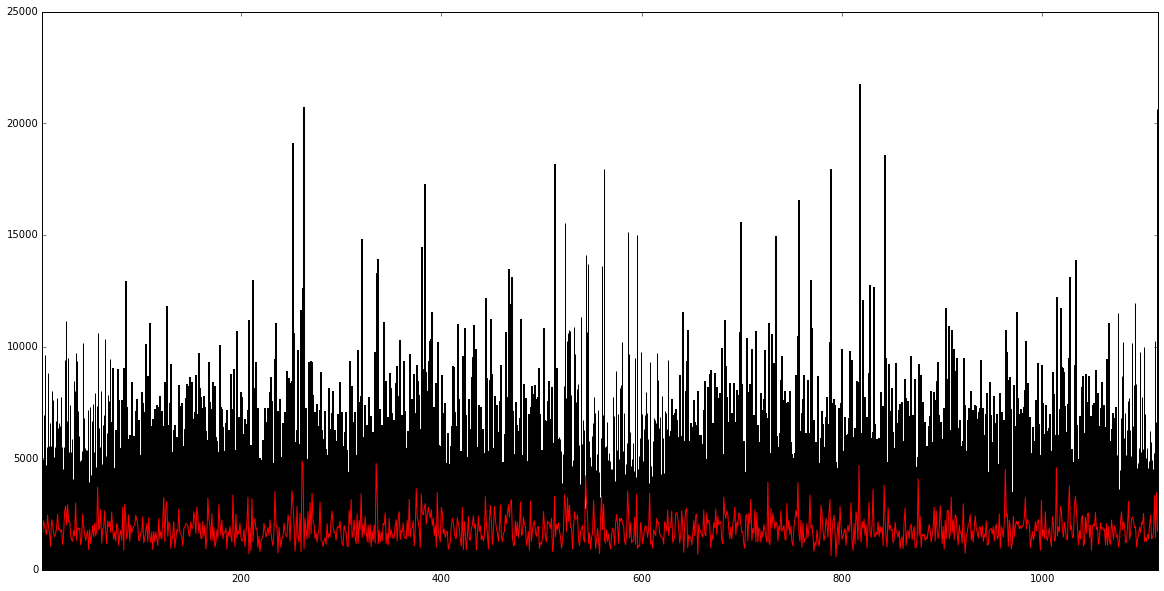

In [135]:
fig = plt.figure(figsize=(20, 10))
plt.xlim(1, 1115)
plt.bar(xrange(1, 1116), grouped.mean()['Sales'], color='r')
plt.plot(xrange(1, 1116), grouped.std()['Sales'], color='r')

In [137]:
np.unique(training['Store'])

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
models = []

for storeId in xrange(1, np.unique(training['Store'].shape[0])):
    tmp = training.loc[training['Store'] == int(storeId)]
    x = tmp[['Store', 'DayOfWeek']].as_matrix()
    y = tmp['Sales'].as_matrix()
    svr = SVR()
    model.append(svr.fit(x, y))